In [1]:
from graphviz import Source
from lambekseq.semcomp import SemComp

SemComp.load_lexicon(abbr_path='../abbr.json',
                     vocab_path='../schema.json')


## Basics

**Semgraphs** (semantic graphs) are an extension of AMR that explicitly represent quantification, scope, plurality, conjunction and disjunction. Semgraphs emphasize descriptive adequacy that theretical linguistis (semantics in particular) cares about.
We start with a simple sentence: "a boy walked a dog'.

In [2]:
ex = 'a boy walked a dog'
pos = 'ind n vt ind n'
sc = SemComp(zip(ex.split(), pos.split()))
sc.unify()

The semgraph of this sentence is composed of those of its words. For example, "boy" and "walked" are as follows:

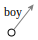

In [3]:
Source(sc.tokens[1].dot_styled)

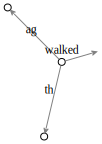

In [4]:
Source(sc.tokens[2].dot_styled)

Semantic composition is simply identifying discourse referents. In this example, the entity that is a boy equals the agent of a walking event. The semgraph of `ex0a` looks like this:

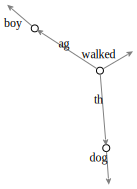

In [5]:
Source(sc.semantics[0].dot_styled)

This graph pins down a walking event, a boy and a dog. The boy is the agent of walking. The dog is the theme of walking. The encoding of this graph resembles the queries of SPARQL:

In [6]:
print(sc.semantics[0].dot)

strict digraph  {
i0 [label=""];
g2u0 [height=0, label="", shape=plaintext, width=0];
i1 [label=""];
g3a0 [label=""];
g3u0 [height=0, label="", shape=plaintext, width=0];
g5u0 [height=0, label="", shape=plaintext, width=0];
i0 -> g2u0  [len="0.5", xlabel=boy];
i1 -> g5u0  [len="0.5", xlabel=dog];
g3a0 -> g3u0  [len="0.5", xlabel=walked];
g3a0 -> i1  [xlabel=th];
g3a0 -> i0  [xlabel=ag];
}



## Quantification and Scope

Let's move onto quantifiers: "every boy walked a dog".

In [7]:
ex = 'every boy walked a dog'
pos = 'qnt n vt ind n'
sc = SemComp(zip(ex.split(), pos.split()))
sc.unify()

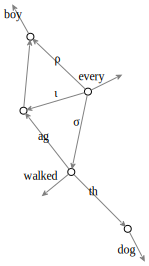

In [8]:
Source(sc.semantics[0].dot_styled)

Intuitively, this graph encodes a program: for a set of boys, pull each x out of it, then x is the agent of a walking event, whose theme is a dog.
We explicitly represent quantification encoded by "every", and we distinguish such genuine quantifiers from indefinites like "a dog".
In this example, the value of "a dog" can vary across boys. We can fix the value "a dog" by valuating it before quantification, deriving a reading where there is a specific dog such that every boy walked it. This is known in linguistics as "a dog" taking scope over "every boy".

In [9]:
ex = 'every boy walked a dog'
pos = 'qnt n vt indl n'
xref = [('g4x0', 'g1a0')]
sc = SemComp(zip(ex.split(), pos.split()), xref)
sc.unify()

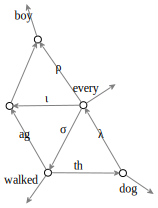

In [10]:
Source(sc.semantics[0].dot_styled)

Long story short, we have a λ-edge from "dog" to "every". The net effect is to have the former valued before the latter. Technically, this relates to the definition of the **root** (i.e. starting point) of a cyclic graph.

What if we have two quantifiers? For example, "every boy walked most dogs":

In [11]:
ex = 'every boy walked most dogs'
pos = 'qnt n vt qnt n'
sc = SemComp(zip(ex.split(), pos.split()))
sc.unify()

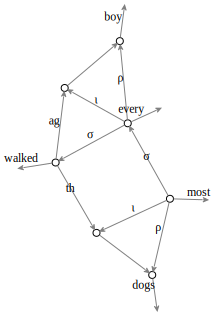

In [12]:
Source(sc.semantics[0].dot_styled)

The root of an acylic graph is the vertex that has 0 incoming edges. Recall the quantification program from above. This semgraph reads as "for the most part of a set of dogs, each member x is such that for a set of boys, each member y is such that there is a walking, its agent is y, its theme is x." In other words, "most dogs" is considered before "every boy".

The same sentence has another reading where "every boy" is considered before "most dogs".

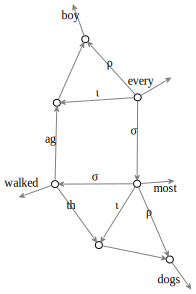

In [13]:
Source(sc.semantics[1].dot_styled)

In general, when there are `n` quantifiers, we have `n!` scope permutations.

In [14]:
ex = 'every boy walked most dogs in every park'
pos = 'qnt n vt qnt n pv qnt n'
sc = SemComp(zip(ex.split(), pos.split()), calc='ccg')
sc.unify()

In [15]:
len(sc.semantics)

6

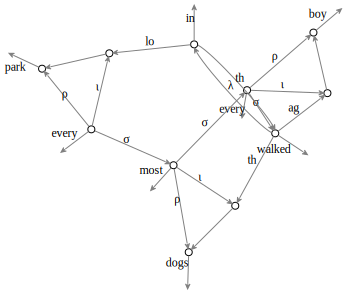

In [16]:
Source(sc.semantics[0].dot_styled)

The above is one of those 6 readings: every park >> every boy >> most dogs

Here is an example of **donkey sentences**: "every boy who walked a dog fed it." The value of "it" co-varies with "boy".

In [17]:
ex = 'every boy who walked a dog fed it'
pos = 'qnt n rl vt ind n vt pro'
xref = [('g8x0', 'g6a0')]
sc = SemComp(zip(ex.split(), pos.split()), xref)
sc.unify()

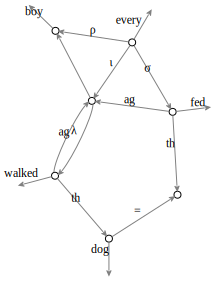

In [18]:
Source(sc.semantics[0].dot_styled)

## Conjunction

Let's move onto explicit conjunction and split antecedents of pronouns.

In [19]:
ex = 'Joe washed and Ben shaved himself'
pos = 'prp vt cj prp vt pro'
xref = [('g6x0', 'g1a0'), ('g6x1', 'g4a0')]
sc = SemComp(zip(ex.split(), pos.split()), xref)
sc.unify()

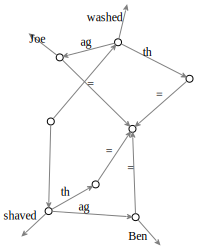

In [20]:
Source(sc.semantics[0].dot_styled)

Here we are summing two events, one is Joe's self-washing, the other Ben's self-shaving. Conjoining "Joe washed" and "Ben shaved" ends up with having them share the theme syntactically. "himself" refers to Joe in the first conjunct, but Ben in the second conjunct.

The following example illustrates that conjunction can happen at the NP level or the quantifier level.

In [21]:
ex = 'every boy and every dog smile'
pos = 'qnt n cj qnt n vi'
sc = SemComp(zip(ex.split(), pos.split()), calc='ccg')
sc.unify()

In [22]:
len(sc.semantics)

3

Conjunction happening at the NP level corresponds to the readings derived from quantifier raising. We have two cases:  

1. For every boy x it's such that for every dog y, x and y smiled (every boy >> every dog)
2. For every dog x it's such that for every boy y, y and x smiled (every dog >> every boy)

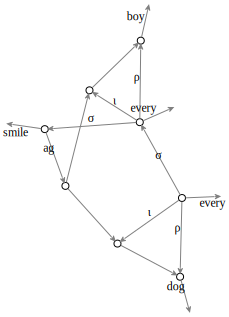

In [23]:
Source(sc.semantics[0].dot_styled)

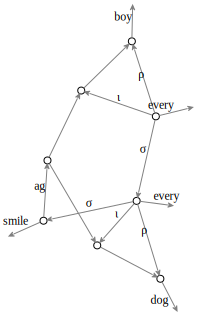

In [24]:
Source(sc.semantics[1].dot_styled)

Conjunction happening at the quantifier level amounts to **distributing** the verb phrase "smile" over each conjunct. The above example can be paraphrased as "every boy smiled and every dog smiled."

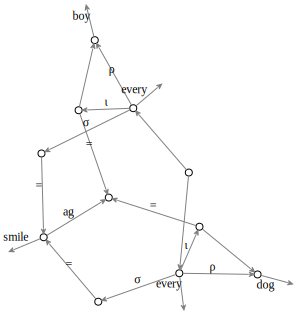

In [25]:
Source(sc.semantics[2].dot_styled)

## Control Verbs

Object control: "Joe asked Ben to walk a dog". Here the object of asking is the subject of the walking.

In [26]:
ex = 'Joe ask Ben to walk a dog'
pos = 'prp vco prp inf vt ind n'
sc = SemComp(zip(ex.split(), pos.split()))
sc.unify()

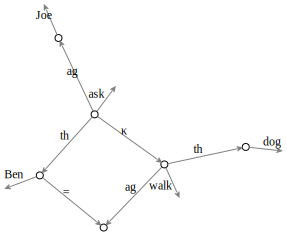

In [27]:
Source(sc.semantics[0].dot_styled)

Here kappa stands for "content". In model-theoretical semantics, the subgraph a kappa-edge points to induces intensionality.

Subject control: "Joe promised Ben to walk a dog". Here the subject of promising is the subject of walking.

In [28]:
ex = 'Joe promise Ben to walk a dog'
pos = 'prp vcs prp inf vt ind n'
sc = SemComp(zip(ex.split(), pos.split()))
sc.unify()

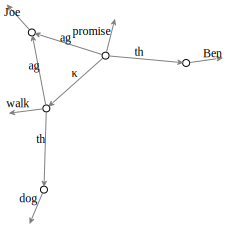

In [29]:
Source(sc.semantics[0].dot_styled)